In [1]:
from pandas import read_csv
data = read_csv("/home/srikar/ML_Exam/regression_data.csv")

In [88]:
print(data.shape)
print(data.dtypes)
data.head()

(21613, 22)
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
is_basement        int64
dtype: object


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [5]:
target = "price"
features = data.drop(target,1).columns
data['price'] = data.mean(numeric_only=True, axis=1)


In [6]:
features_by_dtype = {}

for f in features:
    dtype = str(data[f].dtype)
    if dtype not in features_by_dtype.keys():
        features_by_dtype[dtype] = [f]
    else:
        features_by_dtype[dtype] += [f]
        
for k in features_by_dtype.keys():
    string = "%s: %s" % (k , len(features_by_dtype[k]))
    print(string)

int64: 15
object: 1
float64: 4


In [7]:
keys = iter(features_by_dtype.keys())

In [8]:
k = next(keys)
dtype_list = features_by_dtype[k]
for d in dtype_list:
    string = "%s: %s" % (d,len(data[d].unique()))
    print(string)

id: 21436
bedrooms: 13
sqft_living: 1038
sqft_lot: 9782
waterfront: 2
view: 5
condition: 5
grade: 12
sqft_above: 946
sqft_basement: 306
yr_built: 116
yr_renovated: 70
zipcode: 70
sqft_living15: 777
sqft_lot15: 8689


In [9]:
count_features = ["bedrooms"]
count_features += ["view", "condition", "grade"]


In [10]:
categorical_features = ["waterfront"]

In [11]:
count_features += ["view", "condition", "grade"]


In [12]:
categorical_features += ["zipcode"]

In [13]:
temporal_features = ["yr_renovated", "yr_built"]

In [14]:
numerical_features = [f for f in dtype_list if not f in categorical_features + temporal_features + ["id"]]

In [15]:
k = next(keys)
dtype_list = features_by_dtype[k]
for d in dtype_list:
    string = "%s: %s" % (d,len(data[d].unique()))
    print(string)

date: 372


In [16]:
temporal_features += dtype_list

In [17]:
k = next(keys)
dtype_list = features_by_dtype[k]
for d in dtype_list:
    string = "%s: %s" % (d,len(data[d].unique()))
    print(string)

bathrooms: 30
floors: 6
lat: 5034
long: 752


In [18]:
count_features += ["floors","bathrooms"]

In [19]:
numerical_features += dtype_list

In [20]:
numerical_features

['bedrooms',
 'sqft_living',
 'sqft_lot',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',
 'floors',
 'lat',
 'long']

In [21]:
count_features

['bedrooms',
 'view',
 'condition',
 'grade',
 'view',
 'condition',
 'grade',
 'floors',
 'bathrooms']

In [22]:
categorical_features

['waterfront', 'zipcode']

In [23]:
temporal_features

['yr_renovated', 'yr_built', 'date']

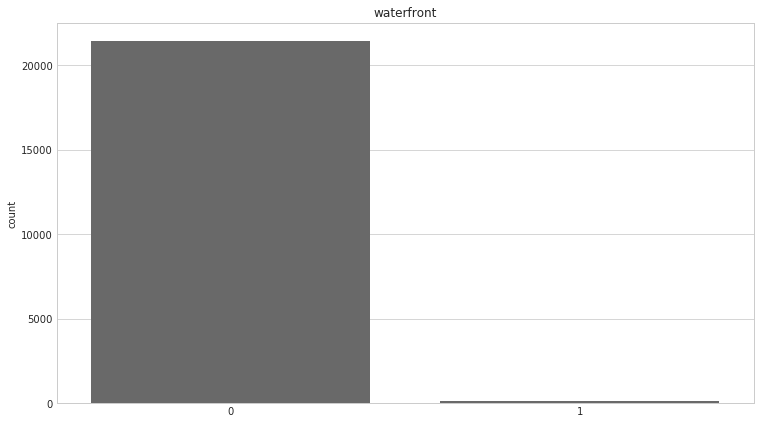

,0,1
waterfront,99.25,0.75


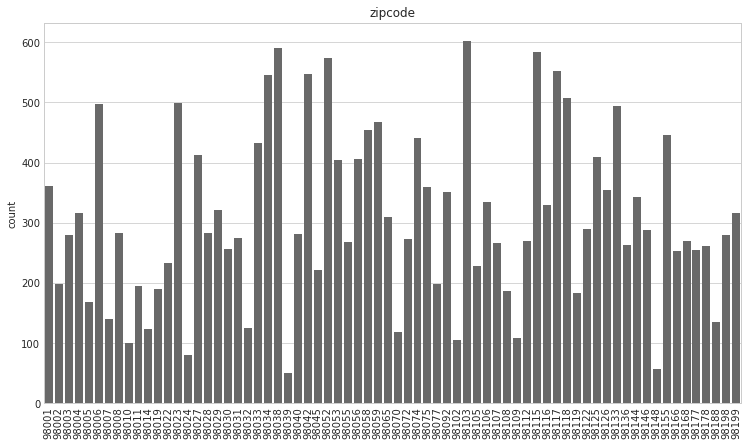

,98103,98038,98115,98052,98117,98042,98034,98118,98023,98006,...,98188,98032,98014,98070,98109,98102,98010,98024,98148,98039
zipcode,2.79,2.73,2.7,2.66,2.56,2.54,2.52,2.35,2.31,2.3,...,0.63,0.58,0.57,0.55,0.5,0.49,0.46,0.37,0.26,0.23


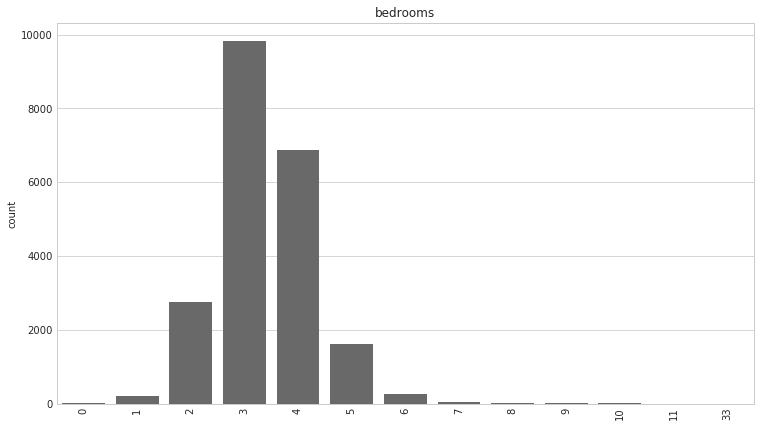

,3,4,2,5,6,1,7,8,0,9,10,11,33
bedrooms,45.45,31.84,12.77,7.41,1.26,0.92,0.18,0.06,0.06,0.03,0.01,0.0,0.0


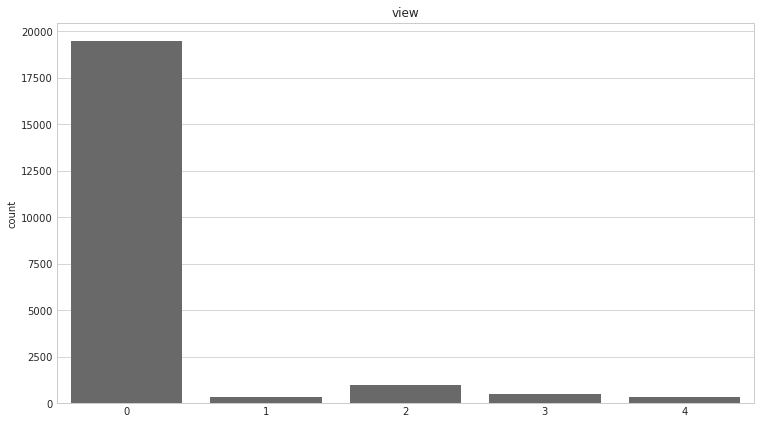

,0,2,3,1,4
view,90.17,4.46,2.36,1.54,1.48


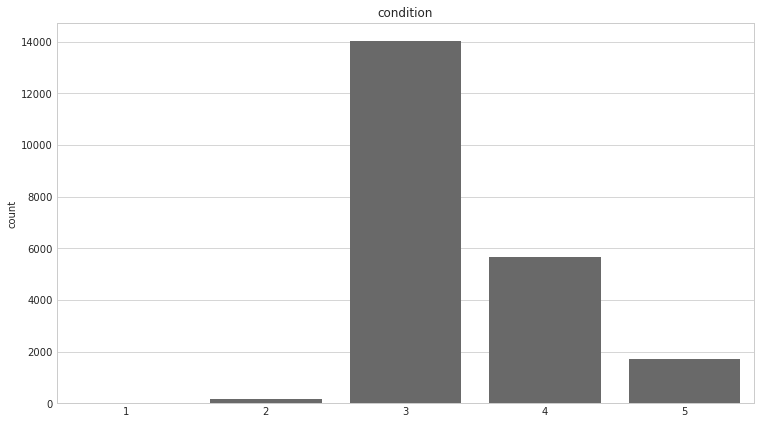

,3,4,5,2,1
condition,64.92,26.28,7.87,0.8,0.14


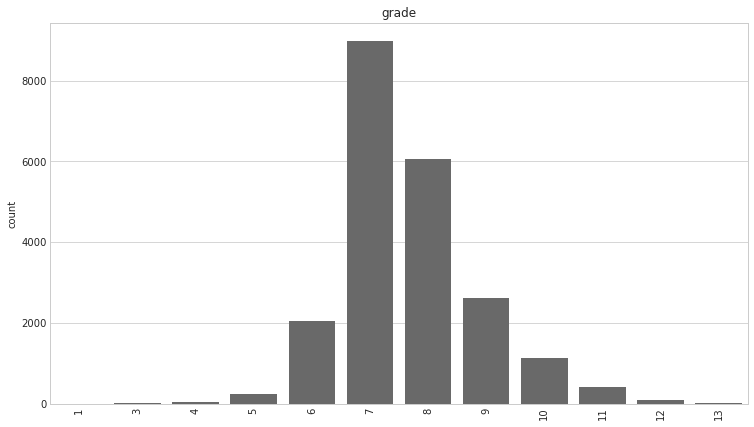

,7,8,9,6,10,11,5,12,4,13,3,1
grade,41.55,28.08,12.1,9.43,5.25,1.85,1.12,0.42,0.13,0.06,0.01,0.0


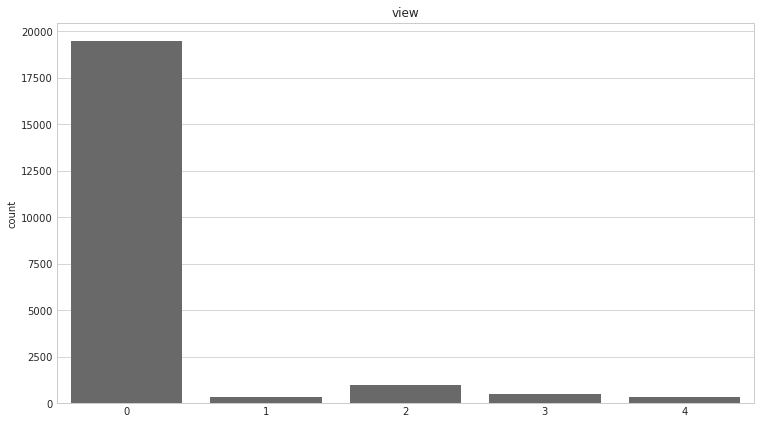

,0,2,3,1,4
view,90.17,4.46,2.36,1.54,1.48


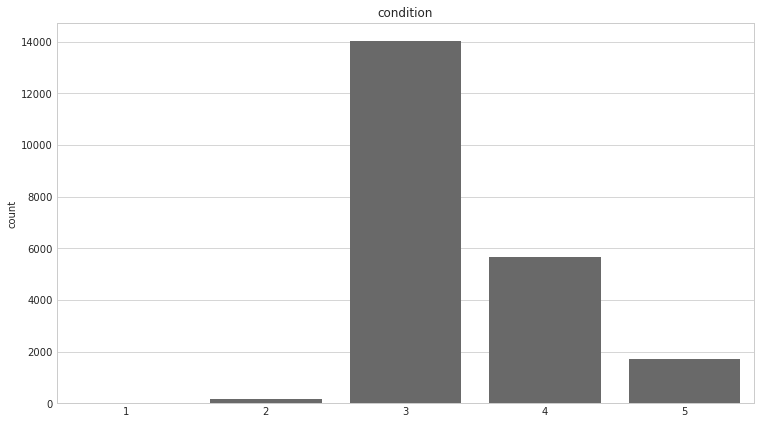

,3,4,5,2,1
condition,64.92,26.28,7.87,0.8,0.14


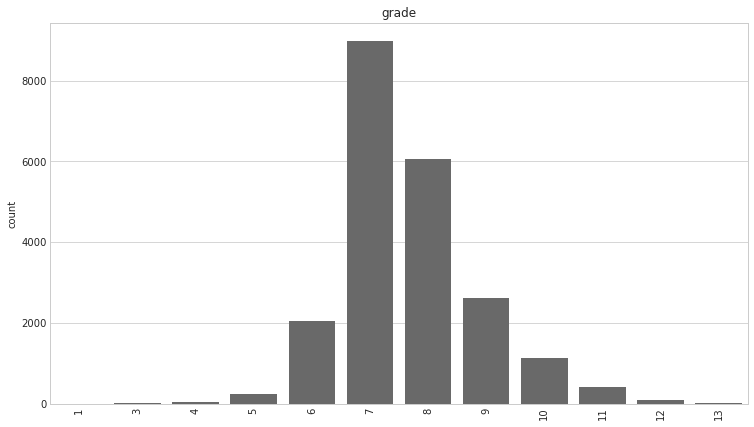

,7,8,9,6,10,11,5,12,4,13,3,1
grade,41.55,28.08,12.1,9.43,5.25,1.85,1.12,0.42,0.13,0.06,0.01,0.0


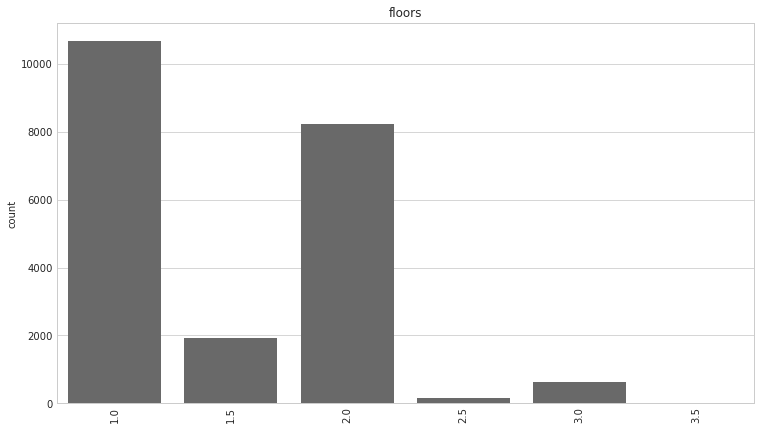

,1.0,2.0,1.5,3.0,2.5,3.5
floors,49.41,38.13,8.84,2.84,0.74,0.04


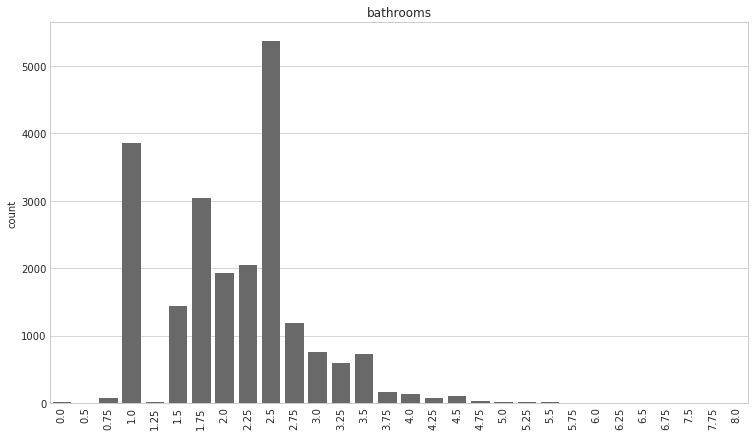

,2.5,1.0,1.75,2.25,2.0,1.5,2.75,3.0,3.5,3.25,...,1.25,6.0,0.5,5.75,8.0,6.25,6.5,6.75,7.5,7.75
bathrooms,24.89,17.82,14.1,9.47,8.93,6.69,5.48,3.48,3.38,2.73,...,0.04,0.03,0.02,0.02,0.01,0.01,0.01,0.01,0.0,0.0


In [24]:
from seaborn import countplot, axes_style
from matplotlib.pyplot import show,figure
from pandas import DataFrame
from IPython.display import display
%matplotlib inline

with axes_style("whitegrid"):
    for feature in categorical_features + count_features:
        
        figure(figsize=(12.5,7))
        ax = countplot(data[feature], color="dimgrey")
        ax.set_title(feature)
        ax.set_xlabel("", visible=False)
        if data[feature].unique().size > 5: ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        show()
        
        display(DataFrame(data[feature].value_counts().apply(lambda x: x / len(data) * 100).round(2)).T)

In [25]:
from seaborn import distplot, boxplot, despine
from matplotlib.pyplot import subplot
from IPython.display import display
from pandas import DataFrame

def numeric_analysis(series):
    
    no_nulls = series.dropna()
    
    with axes_style({"axes.grid": False}):
        
        cell_1 = subplot(211)
        dp = distplot(no_nulls, kde=False)
        dp.set_xlabel("",visible=False)
        dp.set_yticklabels(dp.get_yticklabels(),visible=False)
        despine(left = True)

        cell_2 = subplot(212, sharex=cell_1)
        boxplot(no_nulls)
        despine(left=True)
    
    show()
    
    display(DataFrame(series.describe().round(2)).T)

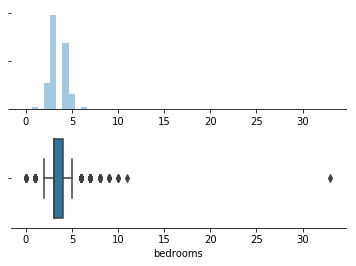

,count,mean,std,min,25%,50%,75%,max
bedrooms,21613.0,3.37,0.93,0.0,3.0,3.0,4.0,33.0


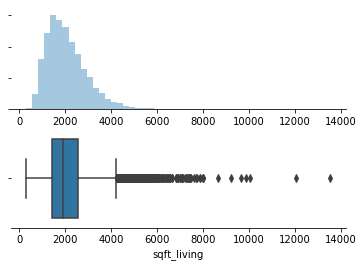

,count,mean,std,min,25%,50%,75%,max
sqft_living,21613.0,2079.9,918.44,290.0,1427.0,1910.0,2550.0,13540.0


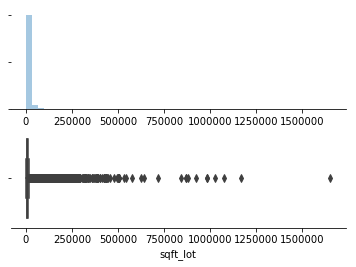

,count,mean,std,min,25%,50%,75%,max
sqft_lot,21613.0,15106.97,41420.51,520.0,5040.0,7618.0,10688.0,1651359.0


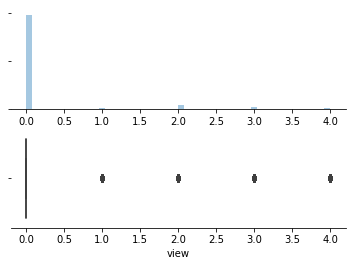

,count,mean,std,min,25%,50%,75%,max
view,21613.0,0.23,0.77,0.0,0.0,0.0,0.0,4.0


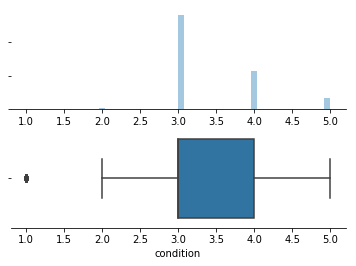

,count,mean,std,min,25%,50%,75%,max
condition,21613.0,3.41,0.65,1.0,3.0,3.0,4.0,5.0


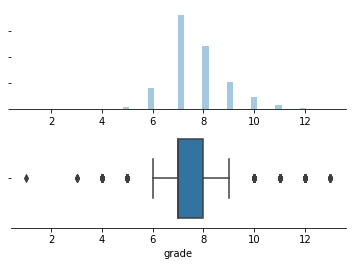

,count,mean,std,min,25%,50%,75%,max
grade,21613.0,7.66,1.18,1.0,7.0,7.0,8.0,13.0


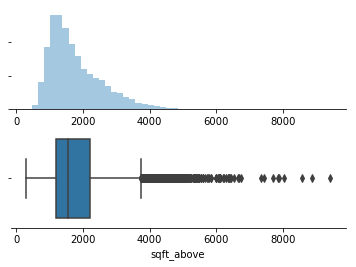

,count,mean,std,min,25%,50%,75%,max
sqft_above,21613.0,1788.39,828.09,290.0,1190.0,1560.0,2210.0,9410.0


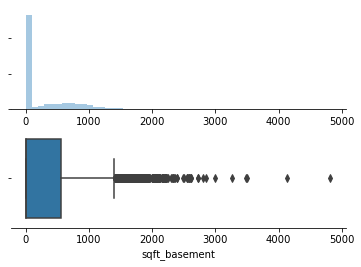

,count,mean,std,min,25%,50%,75%,max
sqft_basement,21613.0,291.51,442.58,0.0,0.0,0.0,560.0,4820.0


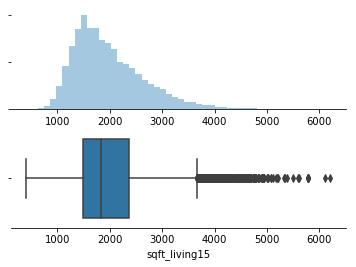

,count,mean,std,min,25%,50%,75%,max
sqft_living15,21613.0,1986.55,685.39,399.0,1490.0,1840.0,2360.0,6210.0


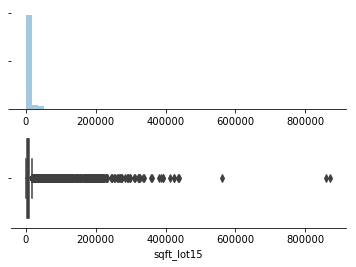

,count,mean,std,min,25%,50%,75%,max
sqft_lot15,21613.0,12768.46,27304.18,651.0,5100.0,7620.0,10083.0,871200.0


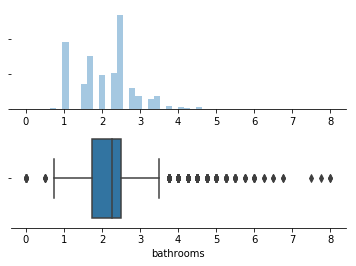

,count,mean,std,min,25%,50%,75%,max
bathrooms,21613.0,2.11,0.77,0.0,1.75,2.25,2.5,8.0


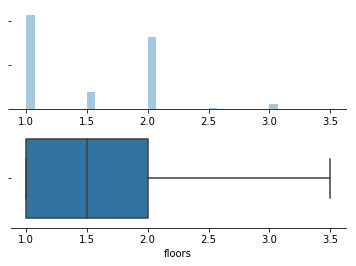

,count,mean,std,min,25%,50%,75%,max
floors,21613.0,1.49,0.54,1.0,1.0,1.5,2.0,3.5


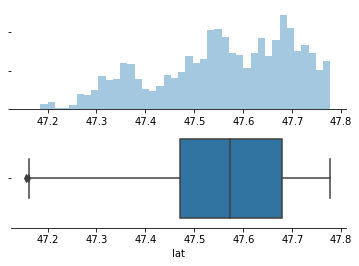

,count,mean,std,min,25%,50%,75%,max
lat,21613.0,47.56,0.14,47.16,47.47,47.57,47.68,47.78


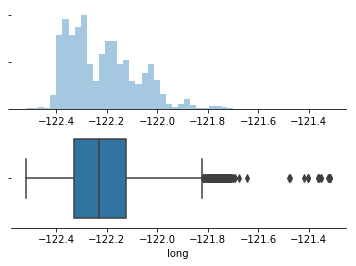

,count,mean,std,min,25%,50%,75%,max
long,21613.0,-122.21,0.14,-122.52,-122.33,-122.23,-122.12,-121.32


In [26]:
for n in numerical_features: 
    numeric_analysis(data[data[n].notnull()][n])

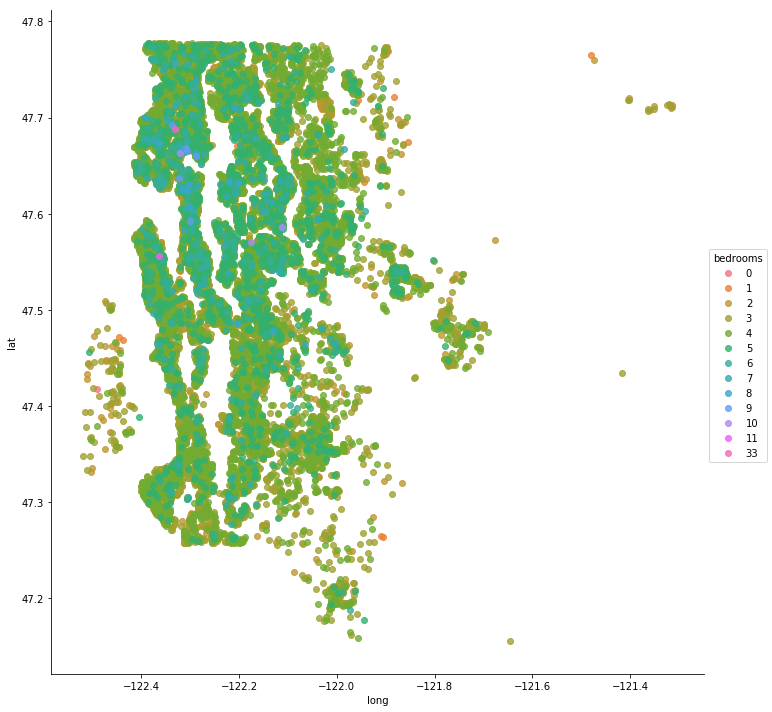

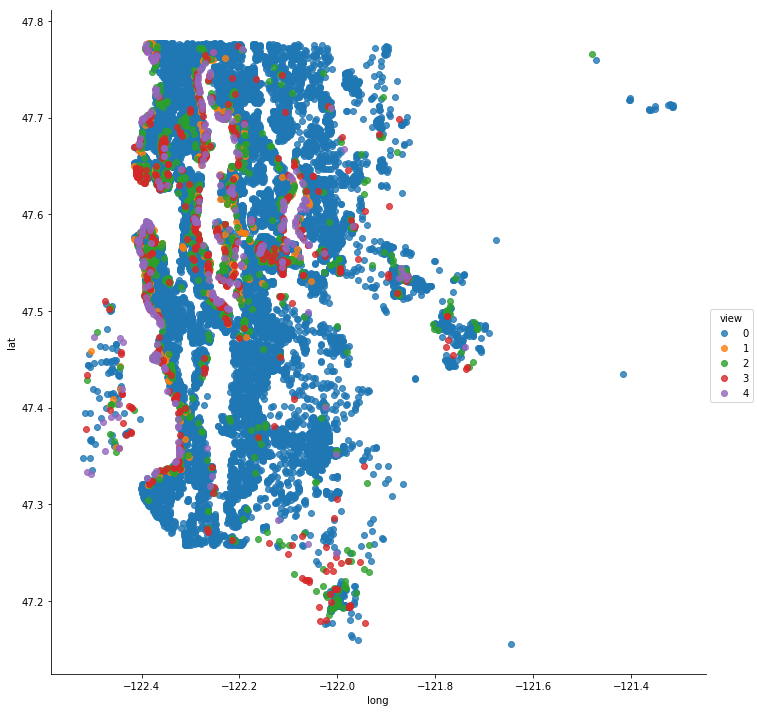

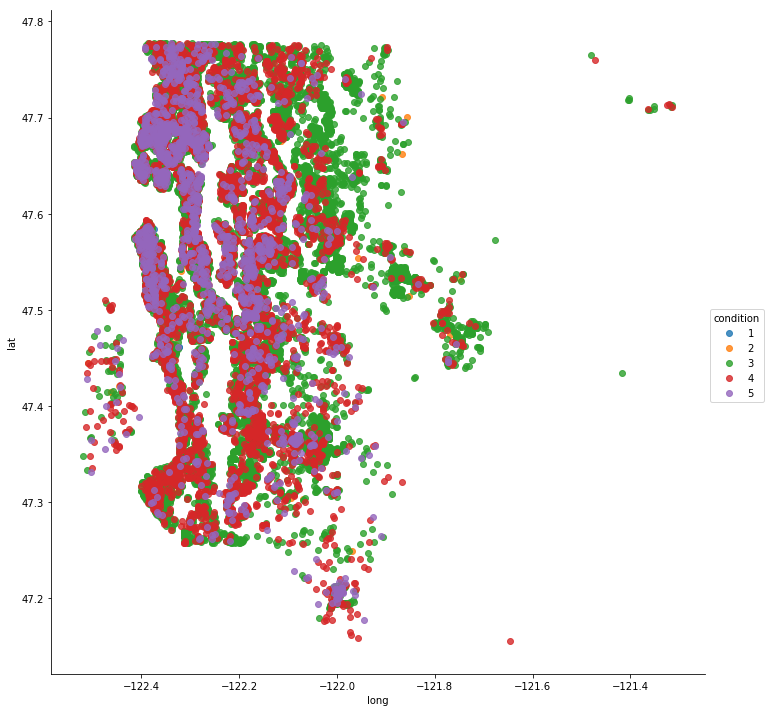

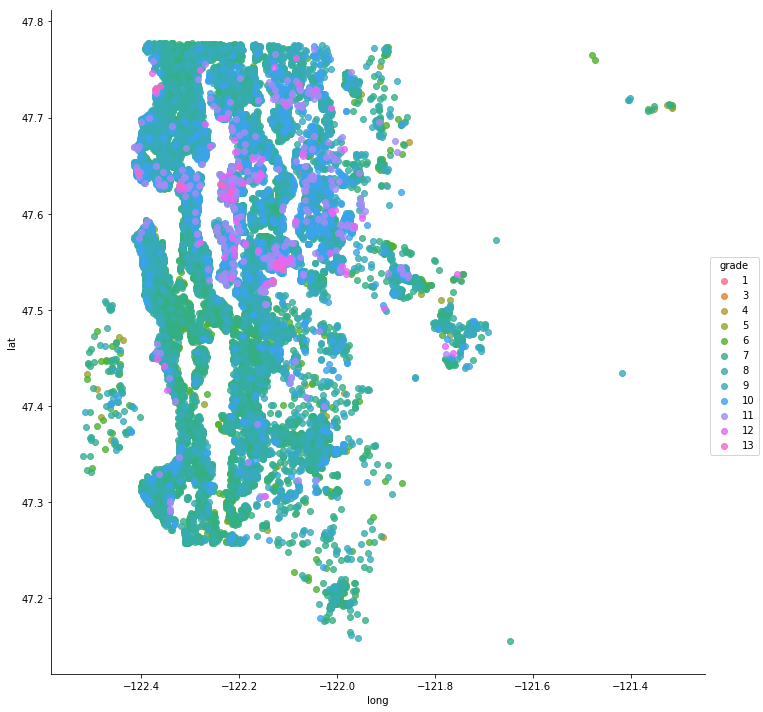

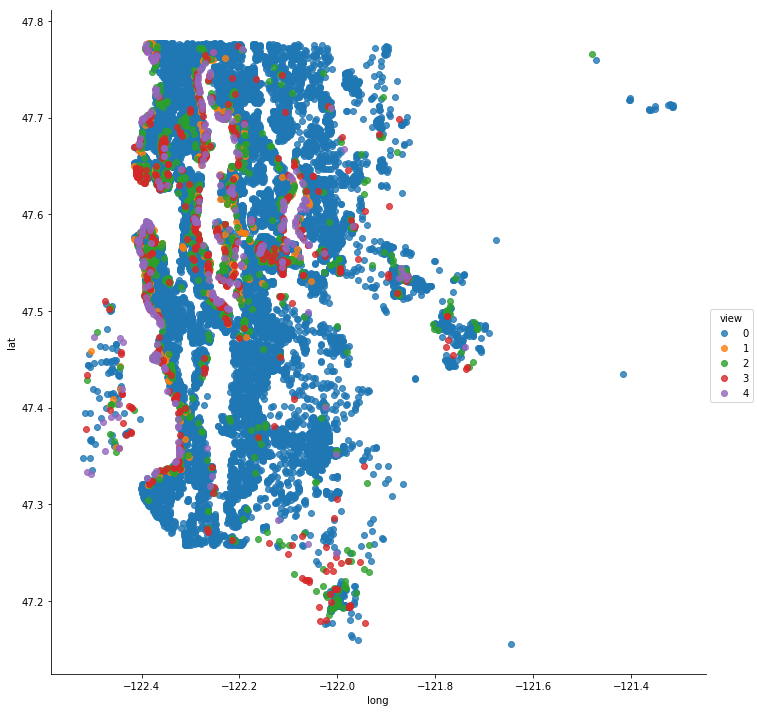

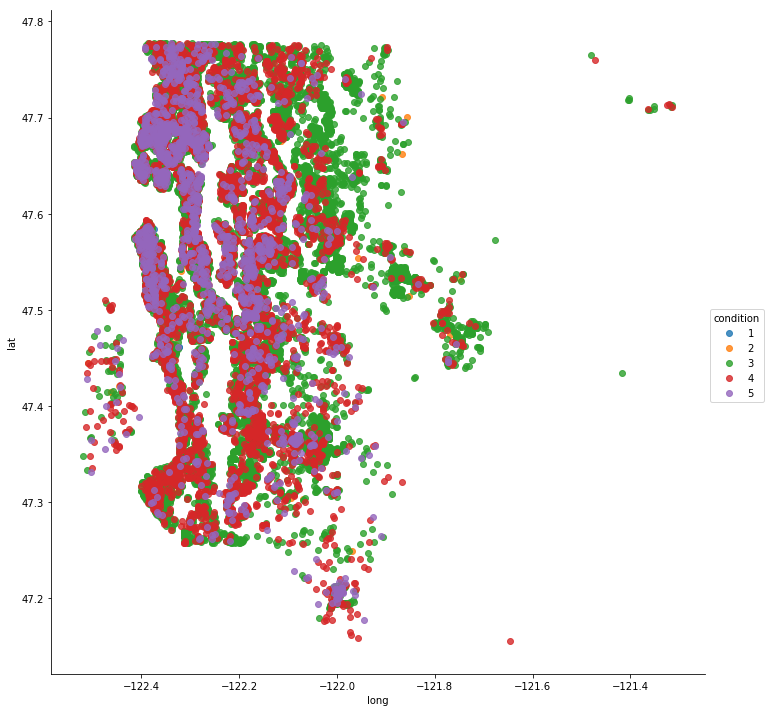

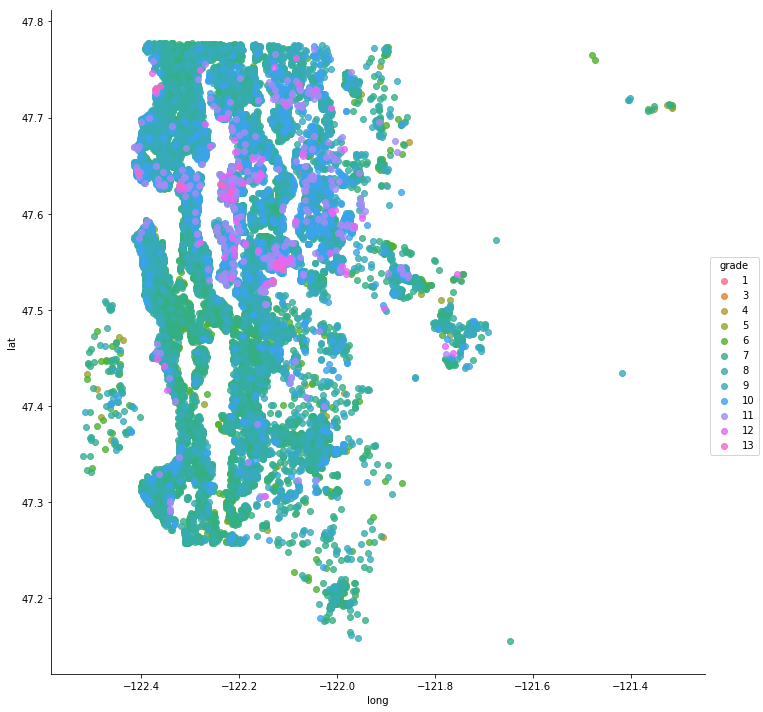

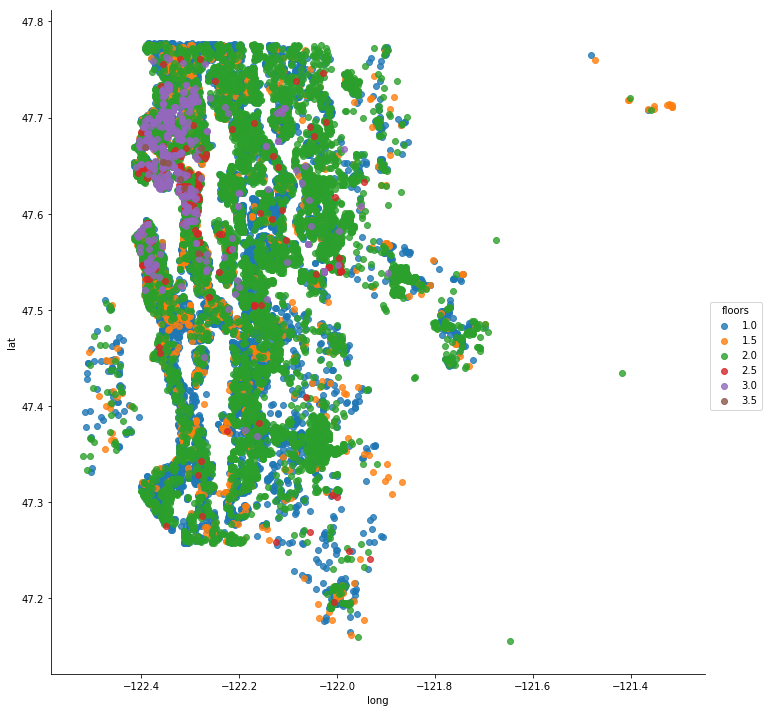

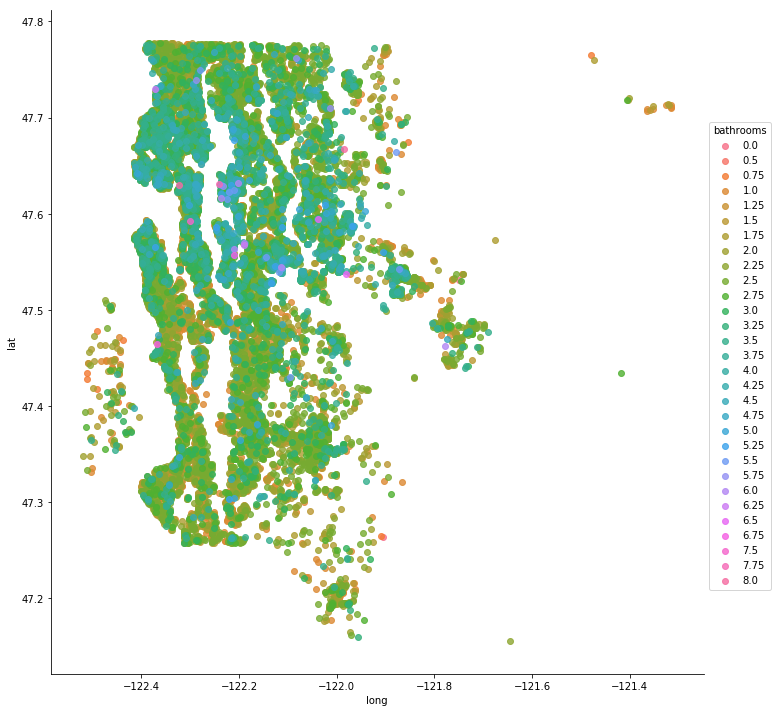

In [27]:
from seaborn import lmplot
from matplotlib.pyplot import figure

for c in count_features:

    lmplot(data=data, x="long", y="lat", fit_reg=False, hue=c, size=10)
    show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [29]:
len(data)

21613

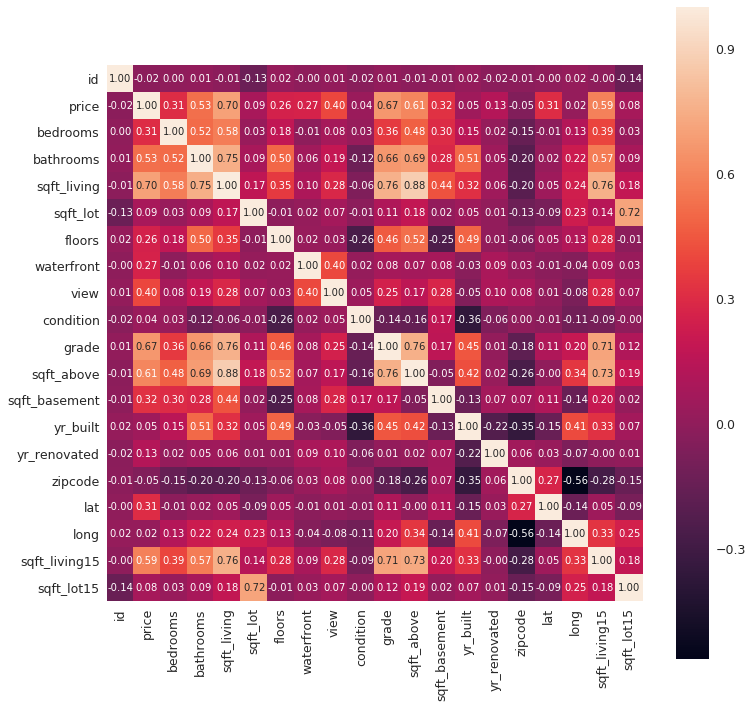

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = data.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(12,12))
hm = sns.heatmap(cor, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=list(cor.columns), xticklabels=list(cor.columns))
plt.show()

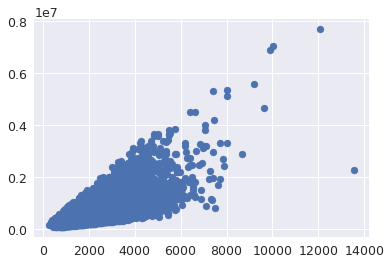

In [31]:
plt.scatter(data.sqft_living,data.price)
plt.show()

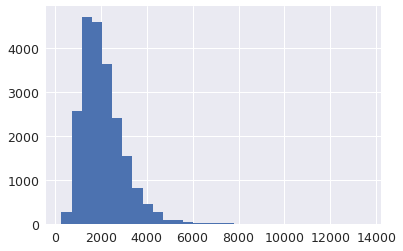

In [32]:
plt.hist(data.sqft_living,bins=30)
plt.show()

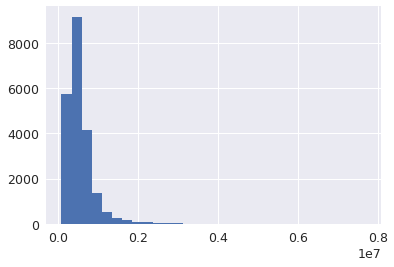

In [33]:
plt.hist(data.price,bins=30)
plt.show()

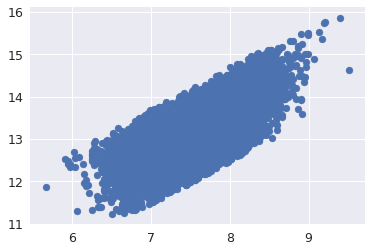

In [34]:
#check with nplog()
import numpy as np
plt.scatter(np.log(data.sqft_living),np.log(data.price))
plt.show()

In [35]:
(cor["price"] - cor["sqft_living"]).sort_values()

sqft_living     -0.297965
sqft_above      -0.271029
bedrooms        -0.268321
yr_built        -0.264037
bathrooms       -0.229528
long            -0.218597
sqft_living15   -0.171041
sqft_basement   -0.111227
sqft_lot15      -0.100838
floors          -0.097155
grade           -0.095270
sqft_lot        -0.083165
id              -0.004504
yr_renovated     0.071071
condition        0.095114
view             0.112682
zipcode          0.146227
waterfront       0.162552
lat              0.254474
price            0.297965
dtype: float64

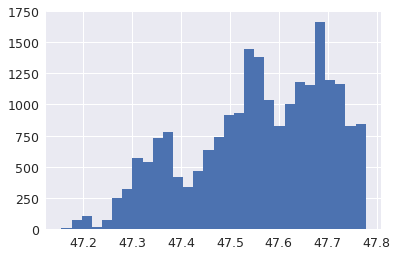

In [36]:
plt.hist(data.lat,bins=30)
plt.show()

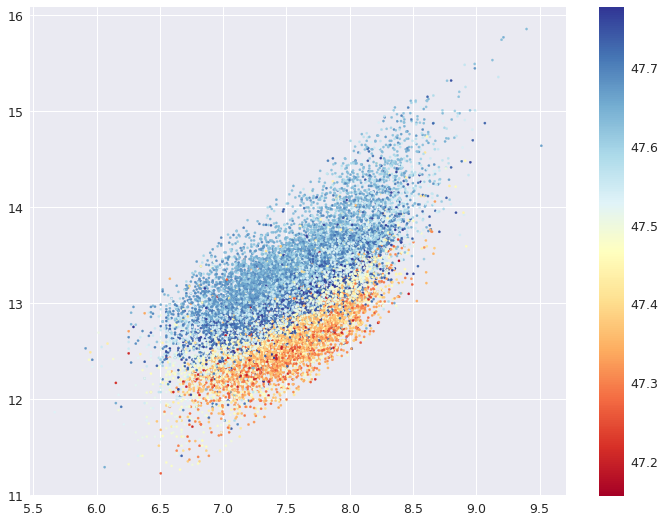

In [37]:
cm = plt.cm.get_cmap('RdYlBu')
#cm = plt.cm.get_cmap('gnuplot')
plt.figure(figsize=(12,9))
plt.scatter(np.log(data.sqft_living),np.log(data.price),
           c = data.lat, cmap = cm, s=5)
plt.colorbar()
plt.show()

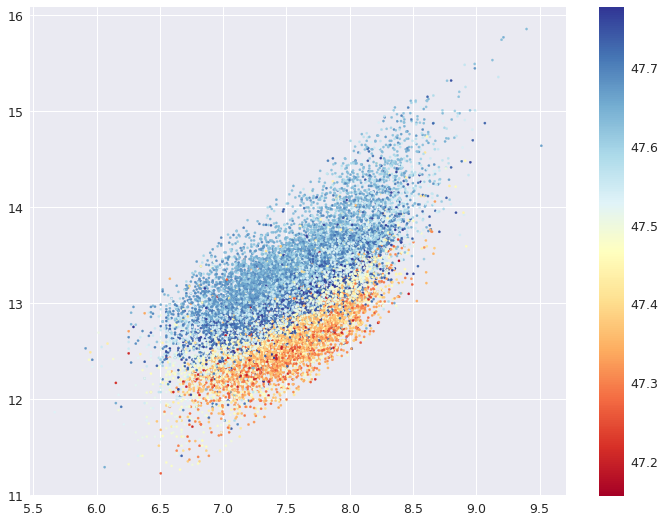

In [38]:
cm = plt.cm.get_cmap('RdYlBu')
#cm = plt.cm.get_cmap('gnuplot')
plt.figure(figsize=(12,9))
plt.scatter(np.log(data.sqft_living),np.log(data.price),
           c = data.lat, cmap = cm, s=5)
plt.colorbar()
plt.show()

In [39]:
data.waterfront.unique()

array([0, 1])

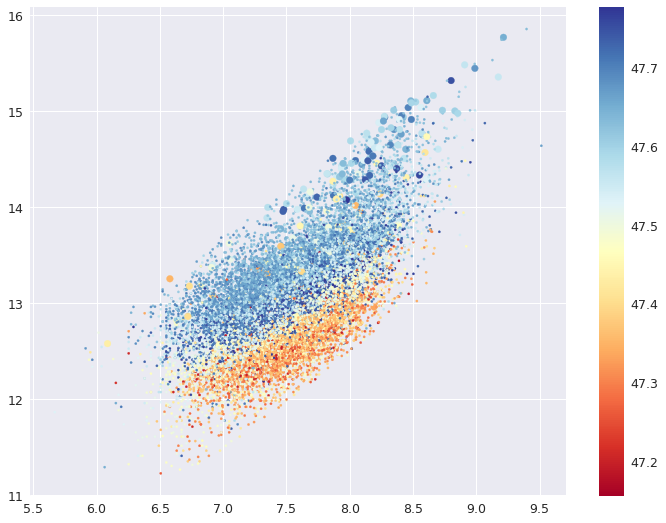

In [40]:
cm = plt.cm.get_cmap('RdYlBu')
#cm = plt.cm.get_cmap('gnuplot')
plt.figure(figsize=(12,9))
plt.scatter(np.log(data.sqft_living),np.log(data.price),
           c = data.lat, cmap = cm, s=(data.waterfront*40 + 5))
plt.colorbar()
plt.show()

In [41]:
print(data.view.unique())

[0 3 4 2 1]


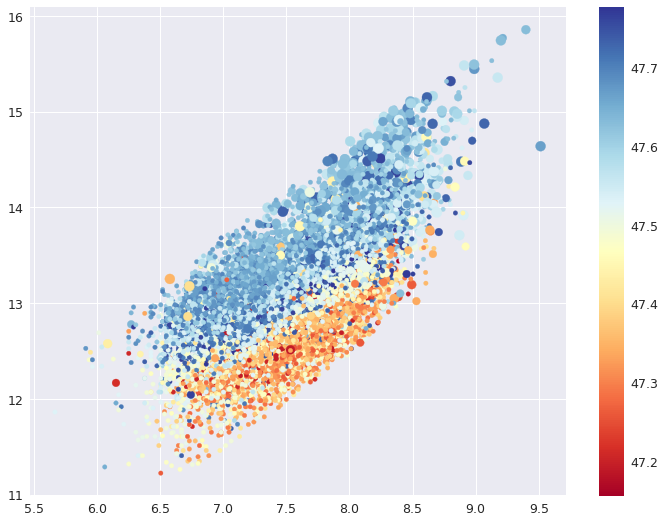

In [42]:
#cm = plt.cm.get_cmap('Set1')
cm = plt.cm.get_cmap('RdYlBu')
#cm = plt.cm.get_cmap('gnuplot')
plt.figure(figsize=(12,9))
plt.scatter(np.log(data.sqft_living),np.log(data.price),
           c = data.lat, cmap = cm, s=(data.view+1)*20)# +1 because we don't want 0s to be invisible.
plt.colorbar()
plt.show()

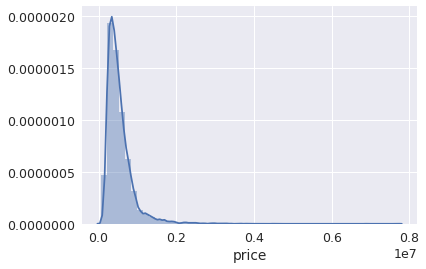

In [43]:
# histogram of prices
sns.distplot(data["price"])

In [53]:
# average price for no. of bedrooms in house
grpby_bedrooms_df = data[["price", "bedrooms"]].groupby(by = "bedrooms", as_index = False)
grpby_bedrooms_df = grpby_bedrooms_df.mean()
grpby_bedrooms_df.head()

,bedrooms,price
0,0,409503.846154
1,1,317642.884422
2,2,401372.681884
3,3,466232.078481
4,4,635419.504214


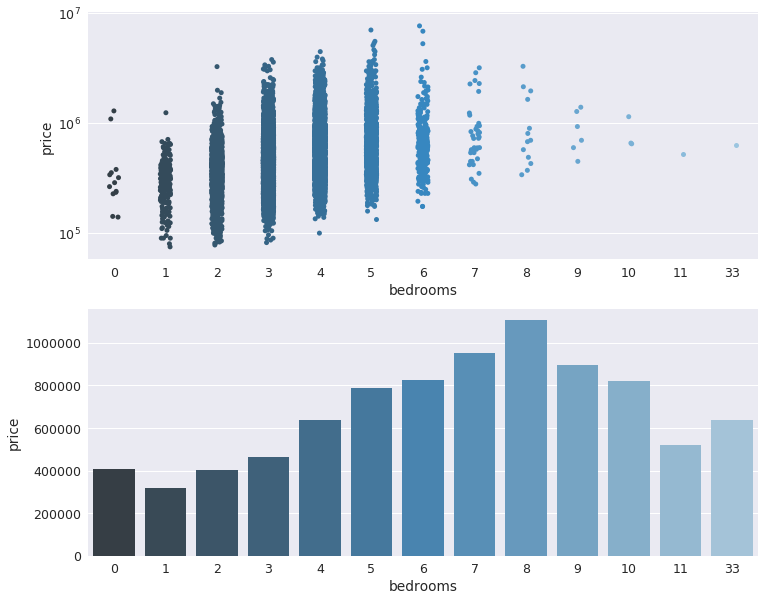

In [55]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.set(yscale = "log")
sns.stripplot(x = "bedrooms", y = "price", data = data, ax = ax1, jitter=True, palette="Blues_d")
sns.barplot(x = "bedrooms", y = "price", data = grpby_bedrooms_df, ax = ax2, palette="Blues_d")

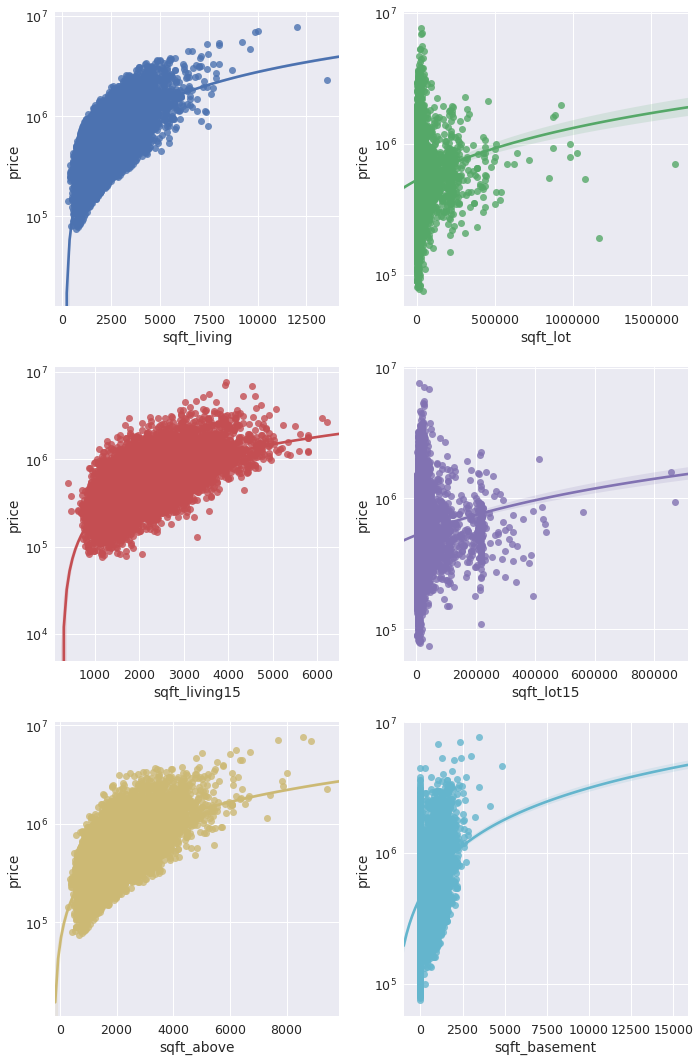

In [56]:
sqft = ["sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15", "sqft_above", "sqft_basement"]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (10, 15))
ax1.set(yscale = "log")
ax2.set(yscale = "log")
ax3.set(yscale = "log")
ax4.set(yscale = "log")
ax5.set(yscale = "log")
ax6.set(yscale = "log")

sns.regplot(x = sqft[0], y = "price", data = data, ax = ax1)
sns.regplot(x = sqft[1], y = "price", data = data, ax = ax2)
sns.regplot(x = sqft[2], y = "price", data = data, ax = ax3)
sns.regplot(x = sqft[3], y = "price", data = data, ax = ax4)
sns.regplot(x = sqft[4], y = "price", data = data, ax = ax5)
sns.regplot(x = sqft[5], y = "price", data = data, ax = ax6)

fig.tight_layout()
# sns.pairplot(data, y_vars = sqft, x_vars = ["price"], size = 5, kind = "reg")

In [62]:
data["is_basement"] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

grpby_is_basement_df = data[["is_basement", "price"]].groupby(by = "is_basement", 
                                                               as_index = False)
grpby_is_basement_df = grpby_is_basement_df.mean()

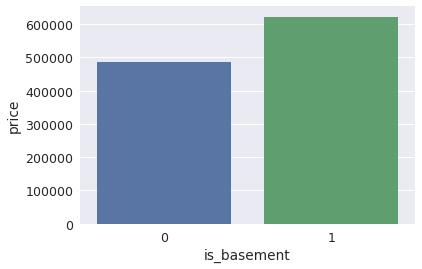

In [63]:
sns.barplot(x = "is_basement", y = "price", data = grpby_is_basement_df)


# Regression #

In [48]:
from sklearn.model_selection import train_test_split as tts
# price is the target variable
target = data['price']

# drop the target var from the dataframe
data_res = data.drop(['id', 'date', 'price'], 1)

data_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(14)
memory usage: 3.0 MB


In [49]:
X_train, X_test, y_train, y_test = tts(data_res, target, test_size = 0.2, random_state = 1206)

In [50]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(17290, 18) (17290,)
(4323, 18) (4323,)


In [ ]:
#linear regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lin_reg = LinearRegression()

# fit the linear regression model with the training data
lin_reg.fit(X_train, y_train)

# make predictions using X_test
pred = lin_reg.predict(X_test)

# since we're dealing with regression, we use the R^2 score as our metric.
score = r2_score(y_test, pred)
print ("r2 score: %.4f" % score)

r2 score: 0.7007


In [64]:
#lasso regression

In [65]:
# Dropping a few columns.  Waterfront and view are binary. 
data_lasso = data.drop(['id', 'date', 'view', 'waterfront'],axis=1)

In [66]:
y = data_lasso.price.values
data_lasso = data_lasso.drop(['price'], axis=1)


In [67]:
X = data_lasso.as_matrix()

In [68]:
from sklearn.linear_model import  Lasso
# create a lasso regressor
lasso = Lasso(alpha=0.2, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ -4.60616315e+04   4.42896928e+04   2.11522527e+02   1.57178394e-01
   1.07234981e+04   2.87830756e+04   1.01780858e+05  -2.72327712e+01
  -1.62810843e+01  -2.83555115e+03   3.44625085e+01  -4.70983806e+02
   5.57391716e+05  -2.54850614e+05   4.02031760e+01  -3.25026081e-01
  -1.90966294e+04]


/home/srikar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [69]:
#0.001, 0.01, 0.1, 1, or 2
lasso = Lasso(alpha=2, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ -4.51942567e+04   4.36929914e+04   1.84589863e+02   1.33746869e-01
   9.72648433e+03   2.85543689e+04   1.01663769e+05   0.00000000e+00
   6.58051935e+00  -2.81511410e+03   3.42366413e+01  -4.57536856e+02
   5.55461509e+05  -2.50714369e+05   3.99122314e+01  -2.89353985e-01
  -1.54051519e+04]


In [70]:
lasso = Lasso(alpha=0.001, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ -4.61007790e+04   4.45494275e+04   2.85494884e+02   1.59464929e-01
   1.07360880e+04   2.88302637e+04   1.01720070e+05  -1.01458575e+02
  -9.04348851e+01  -2.83748458e+03   3.45175105e+01  -4.72318922e+02
   5.57693045e+05  -2.55402656e+05   4.04629083e+01  -3.28006047e-01
  -1.92281083e+04]


/home/srikar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [71]:
lasso = Lasso(alpha=0.01, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ -4.60990085e+04   4.45376807e+04   2.82149401e+02   1.59361518e-01
   1.07355186e+04   2.88281296e+04   1.01722820e+05  -9.81016293e+01
  -8.70811956e+01  -2.83739713e+03   3.45150230e+01  -4.72258539e+02
   5.57679417e+05  -2.55377689e+05   4.04511616e+01  -3.27871275e-01
  -1.92221620e+04]


/home/srikar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [74]:
lasso = Lasso(alpha=0.1, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ -4.60813036e+04   4.44202127e+04   2.48694566e+02   1.58327407e-01
   1.07298247e+04   2.88067882e+04   1.01750312e+05  -6.45321702e+01
  -5.35443008e+01  -2.83652272e+03   3.44901477e+01  -4.71654718e+02
   5.57543137e+05  -2.55128022e+05   4.03336947e+01  -3.26523551e-01
  -1.91626992e+04]


/home/srikar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [75]:
lasso = Lasso(alpha=1, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ -4.56469070e+04   4.41184876e+04   1.84313283e+02   1.46614301e-01
   1.02315610e+04   2.86930160e+04   1.01692134e+05   0.00000000e+00
   8.80121743e+00  -2.82626803e+03   3.43780284e+01  -4.64929997e+02
   5.56578455e+05  -2.53058938e+05   4.01882658e+01  -3.08691765e-01
  -1.73155658e+04]


In [85]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np

Reg = linear_model.LassoCV(alphas=[0.001, 0.01, 0.1, 1,2])
Reg=Reg.fit(X_train,y_train)
predicted_Y=Reg.predict(X_test)
print ('Lasso')
print ('Best alpha is ')
print(Reg.alpha_ )
print('mae: %.2f' % mean_absolute_error(y_test,predicted_Y)) 
print("Mean squared error: %.2f" % np.mean((y_test-predicted_Y) ** 2))
print('Variance score: %.2f' % Reg.score(X_test, y_test))

/home/srikar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso
Best alpha is 
2.0
mae: 124800.38
Mean squared error: 36289920780.04
Variance score: 0.70


/home/srikar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
